<a href="https://colab.research.google.com/github/geersenthil/Topic-Modeling-/blob/main/Dataset_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#Dataset
from sklearn.datasets import fetch_20newsgroups

#warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


Load Data into CSV

In [ ]:
#method that converts data to csv file
def twenty_newsgroup_data_to_csv():
    news_group_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes') ,shuffle=True)

    df = (pd.DataFrame([news_group_data.data, news_group_data.target.tolist()]).T).sample(1500)
    df.columns = ['text', 'target']

    targets = pd.DataFrame( news_group_data.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out.to_csv('20_newsgroup.csv')
twenty_newsgroup_data_to_csv()



Load in Data

In [ ]:
#read data from CSV
dataset = pd.read_csv('20_newsgroup.csv', delimiter=',')
dataset.sample(10)

,Unnamed: 0,text,target,title
1206,9070,"\n\n\nNo, he does not. Arafat explicitly *den...",17,talk.politics.mideast
230,5341,"Tigers' manager Sparky Anderson gets his 2,000...",9,rec.sport.baseball
166,5720,\nIn fact Adiposity 101 mentions a similar stu...,13,sci.med
68,1457,"wing the suggestion of Stu Lynne, I have poste...",1,comp.graphics
317,9811,\nThere are a couple. I am personally using s...,2,comp.os.ms-windows.misc
945,1259,Quoting pmetzger@snark.shearson.com (Perry E. ...,11,sci.crypt
941,4899,...\n\nHaven't you read any of Noam Chomsky's ...,11,sci.crypt
370,2719,The new name is Florida Panthers. \nThe panth...,10,rec.sport.hockey
1122,2376,What's the difference between loading mouse.co...,3,comp.sys.ibm.pc.hardware
1168,1513,It seems that President Clinton can recognize ...,17,talk.politics.mideast


In [ ]:
# Data Size
dataset.dropna(subset = ["text"], inplace=True)
print("The size of the dataset is: \n", dataset.count())

The size of the dataset is: 
 Unnamed: 0    1463
text          1463
target        1463
title         1463
dtype: int64


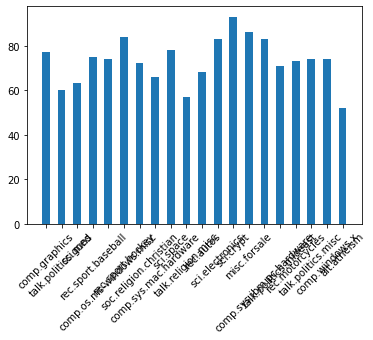

In [ ]:
#Category Distribution
counter = Counter(dataset['title'])
topic_names = counter.keys()
topic_counts = counter.values()
ax = plt.gca()
plt.draw()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(topic_names))
width = 0.5
plt.bar(indexes, topic_counts, width)

ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.xticks(indexes, topic_names)
plt.show()

In [ ]:
print(counter)

Counter({'sci.crypt': 93, 'misc.forsale': 86, 'rec.sport.hockey': 84, 'sci.electronics': 83, 'comp.sys.ibm.pc.hardware': 83, 'sci.space': 78, 'comp.graphics': 77, 'rec.sport.baseball': 75, 'comp.os.ms-windows.misc': 74, 'talk.politics.misc': 74, 'comp.windows.x': 74, 'rec.motorcycles': 73, 'soc.religion.christian': 72, 'talk.politics.mideast': 71, 'rec.autos': 68, 'comp.sys.mac.hardware': 66, 'sci.med': 63, 'talk.politics.guns': 60, 'talk.religion.misc': 57, 'alt.atheism': 52})
